In [37]:
from Class import GetAndFormatTheData
from Class import ReturnOps
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
Datos = GetAndFormatTheData()
RetOp = ReturnOps()

In [39]:
Base = Datos.GetDataFromYahooSeveral('2017-01-01','2017-03-01','1d','Adj Close','AAPL','AMZ','MSFT')

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [44]:
RetOp.ComputeSeveralReturns(Base)

,AAPL,AMZ,MSFT
Date,,,
2017-01-04,-0.001168,-0.007037,-0.004538
2017-01-05,0.005128,0.010817,0.000000
2017-01-06,0.011098,0.023644,0.008611
2017-01-09,0.009206,0.012016,-0.003180
2017-01-10,0.000965,-0.002111,-0.000336
2017-01-11,0.005433,0.000198,0.009239
2017-01-12,-0.004183,0.000000,-0.009154
2017-01-13,-0.001750,0.019496,0.001344
2017-01-17,0.008066,-0.021781,-0.002684


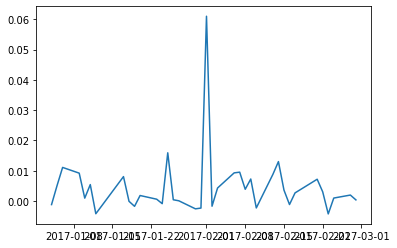

In [32]:
plt.plot(RetOp.ComputeOnereturn(AAPL,'Adj Close'))

In [30]:
RetOp.AnnualizingReturn(0.04,4)

0.1698585600000002

In [2]:
np.random.seed(42)     # Fix random seed
links_coeffs = {0: [((0, -1), 0.7), ((1, -1), -0.8)],
                1: [((1, -1), 0.8), ((3, -1), 0.8)],
                2: [((2, -1), 0.5), ((1, -2), 0.5), ((3, -3), 0.6)],
                3: [((3, -1), 0.4)],
                }
T = 1000     # time series length
data, true_parents_neighbors = pp.var_process(links_coeffs, T=T)
T, N = data.shape

# Initialize dataframe object, specify time axis and variable names
var_names = [r'$X^0$', r'$X^1$', r'$X^2$', r'$X^3$']
dataframe = pp.DataFrame(data, 
                         datatime = np.arange(len(data)), 
                         var_names=var_names)

In [3]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)



## Estimating lagged dependencies


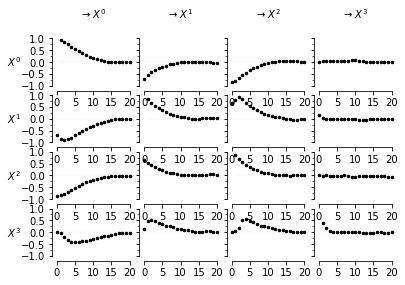

In [4]:
correlations = pcmci.get_lagged_dependencies(tau_max=20)
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5})



In [5]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=8, pc_alpha=None)


##
## Running Tigramite PC algorithm
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = None
max_conds_dim = None
max_combinations = 1



## Variable $X^0$

## Variable $X^1$

## Variable $X^2$

## Variable $X^3$

## Resulting condition sets:

    Variable $X^0$ has 7 parent(s):
    [pc_alpha = 0.3]
        ($X^0$ -1): max_pval = 0.00000, min_val = 0.796
        ($X^1$ -1): max_pval = 0.00000, min_val = 0.748
        ($X^3$ -2): max_pval = 0.13715, min_val = 0.048
        ($X^3$ -1): max_pval = 0.19326, min_val = 0.042
        ($X^2$ -1): max_pval = 0.20477, min_val = 0.041
        ($X^3$ -7): max_pval = 0.25822, min_val = 0.036
        ($X^1$ -4): max_pval = 0.26548, min_val = 0.036

    Variable $X^1$ has 4 parent(s):
    [pc_alpha = 0.3]
        ($X^1$ -1): max_pval = 0.00000, min_val = 0.695
        ($X^3$ -1): max_pval = 0.00000, min_val = 0.484
        ($X^3$ -7): max_pval = 0.14660, min_val = 0.046
        ($X^2$ -1): max_pval = 0.22144, min_val = 0

In [6]:
print("p-values")
print (results['p_matrix'].round(3))
print("MCI partial correlations")
print (results['val_matrix'].round(2))

p-values
[[[1.    0.    0.262 0.894 0.886 0.034 0.417 0.255 0.877]
  [0.067 0.296 0.095 0.765 0.502 0.242 0.234 0.899 0.951]
  [0.832 0.657 0.453 0.011 0.359 0.48  0.901 0.243 0.375]
  [0.827 0.656 0.495 0.592 0.643 0.976 0.775 0.931 0.759]]

 [[0.067 0.    0.15  0.51  0.041 0.005 0.559 0.533 0.392]
  [1.    0.    0.911 0.07  0.576 0.556 0.175 0.732 0.741]
  [0.651 0.764 0.    0.231 0.495 0.43  0.423 0.944 0.238]
  [0.153 0.171 0.088 0.989 0.965 0.859 0.915 0.43  0.671]]

 [[0.832 0.1   0.182 0.443 0.37  0.265 0.998 0.89  0.65 ]
  [0.651 0.072 0.594 0.387 0.883 0.765 0.696 0.44  0.69 ]
  [1.    0.    0.074 0.942 0.956 0.626 0.818 0.526 0.942]
  [0.788 0.575 0.332 0.658 0.603 0.65  0.816 0.055 0.851]]

 [[0.827 0.03  0.021 0.597 0.635 0.2   0.392 0.081 0.85 ]
  [0.153 0.    0.558 0.534 0.72  0.284 0.798 0.016 0.162]
  [0.788 0.114 0.781 0.    0.975 0.098 0.265 0.161 0.642]
  [1.    0.    0.937 0.85  0.503 0.657 0.394 0.795 0.567]]]
MCI partial correlations
[[[ 0.    0.57  0.04  0.   -0.

In [7]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable $X^0$ has 2 link(s):
        ($X^1$ -1): pval = 0.00000 | qval = 0.00000 | val = -0.653
        ($X^0$ -1): pval = 0.00000 | qval = 0.00000 | val = 0.566

    Variable $X^1$ has 2 link(s):
        ($X^3$ -1): pval = 0.00000 | qval = 0.00000 | val = 0.663
        ($X^1$ -1): pval = 0.00000 | qval = 0.00000 | val = 0.622

    Variable $X^2$ has 3 link(s):
        ($X^3$ -3): pval = 0.00000 | qval = 0.00000 | val = 0.451
        ($X^1$ -2): pval = 0.00000 | qval = 0.00000 | val = 0.446
        ($X^2$ -1): pval = 0.00000 | qval = 0.00000 | val = 0.425

    Variable $X^3$ has 1 link(s):
        ($X^3$ -1): pval = 0.00000 | qval = 0.00000 | val = 0.372


In [8]:
link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']



In [9]:
link_matrix

array([[[False,  True, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False]],

       [[False,  True, False, False, False, False, False, False, False],
        [False,  True, False, False, False, False, False, False, False],
        [False, False,  True, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False]],

       [[False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False,  True, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False]],

       [[False, False, False, False, False, False, False, False, False],
        [False,  True, False, False, False, F

(<Figure size 432x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5aa716cb38>)

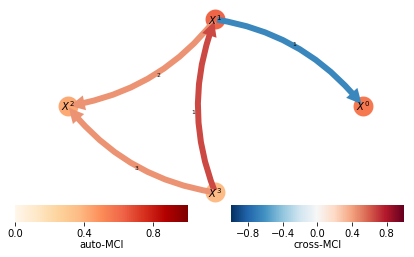

In [10]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    )

(<Figure size 432x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5aa5567438>,
       dtype=object))

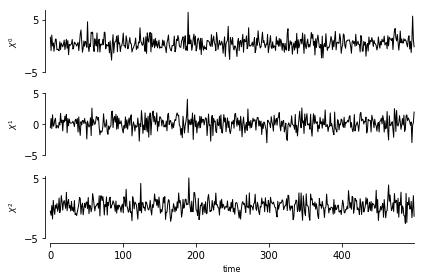

In [11]:
np.random.seed(1)
data = np.random.randn(500, 3)
for t in range(1, 500):
    data[t, 0] += 0.4*data[t-1, 1]**2
    data[t, 2] += 0.3*data[t-2, 1]**2
dataframe = pp.DataFrame(data, var_names=var_names)
tp.plot_timeseries(dataframe)



In [12]:
pcmci_parcorr = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=0)
results = pcmci_parcorr.run_pcmci(tau_max=2, pc_alpha=0.2)
pcmci_parcorr.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable $X^0$ has 0 link(s):

    Variable $X^1$ has 0 link(s):

    Variable $X^2$ has 1 link(s):
        ($X^0$ -1): pval = 0.00000 | val = 0.234


In [13]:
gpdc = GPDC(significance='analytic', gp_params=None)
# gpdc.generate_and_save_nulldists(sample_sizes=range(495, 501),
#     null_dist_filename='dc_nulldists.npz')
gpdc.null_dist_filename ='dc_nulldists.npz'
pcmci_gpdc = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=gpdc,
    verbosity=0)



In [14]:
results = pcmci_gpdc.run_pcmci(tau_max=2, pc_alpha=0.1)
pcmci_gpdc.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)




## Significant links at alpha = 0.01:

    Variable $X^0$ has 1 link(s):
        ($X^1$ -1): pval = 0.00000 | val = 0.030

    Variable $X^1$ has 0 link(s):

    Variable $X^2$ has 1 link(s):
        ($X^1$ -2): pval = 0.00000 | val = 0.028


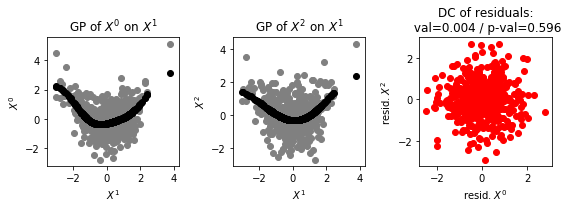

In [15]:
array, dymmy, dummy = gpdc._get_array(X=[(0, -1)], Y=[(2, 0)], Z=[(1, -2)], tau_max=2)
x, meanx = gpdc._get_single_residuals(array, target_var=0, return_means=True)
y, meany = gpdc._get_single_residuals(array, target_var=1, return_means=True)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,3))
axes[0].scatter(array[2], array[0], color='grey')
axes[0].scatter(array[2], meanx, color='black')
axes[0].set_title("GP of %s on %s" % (var_names[0], var_names[1]) )
axes[0].set_xlabel(var_names[1]); axes[0].set_ylabel(var_names[0])
axes[1].scatter(array[2], array[1], color='grey')
axes[1].scatter(array[2], meany, color='black')
axes[1].set_title("GP of %s on %s" % (var_names[2], var_names[1]) )
axes[1].set_xlabel(var_names[1]); axes[1].set_ylabel(var_names[2])
axes[2].scatter(x, y, color='red')
axes[2].set_title("DC of residuals:" "\n val=%.3f / p-val=%.3f" % (gpdc.run_test(
            X=[(0, -1)], Y=[(2, 0)], Z=[(1, -2)], tau_max=2)) )
axes[2].set_xlabel("resid. "+var_names[0]); axes[2].set_ylabel("resid. "+var_names[2])
plt.tight_layout()



(<Figure size 432x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5aa541ac18>,
       dtype=object))

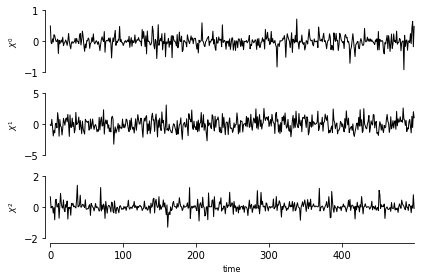

In [16]:
np.random.seed(42)
data = np.random.randn(500, 3)
for t in range(1, 500):
    data[t, 0] *= 0.2*data[t-1, 1]
    data[t, 2] *= 0.3*data[t-2, 1]
dataframe = pp.DataFrame(data, var_names=var_names)
tp.plot_timeseries(dataframe)

In [17]:
pcmci_gpdc = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=gpdc)
results = pcmci_gpdc.run_pcmci(tau_max=2, pc_alpha=0.1)
pcmci_gpdc.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)




## Significant links at alpha = 0.01:

    Variable $X^0$ has 1 link(s):
        ($X^1$ -1): pval = 0.00000 | val = 0.034

    Variable $X^1$ has 1 link(s):
        ($X^2$ 0): pval = 0.01000 | val = 0.017

    Variable $X^2$ has 3 link(s):
        ($X^1$ -2): pval = 0.00000 | val = 0.025
        ($X^0$ -1): pval = 0.00400 | val = 0.018
        ($X^1$ 0): pval = 0.01000 | val = 0.017


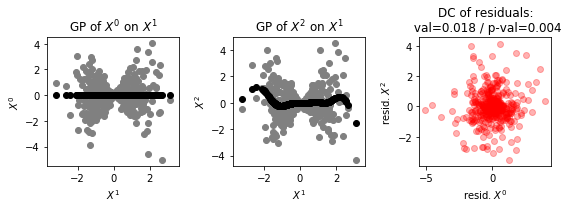

In [18]:
array, dymmy, dummy = gpdc._get_array(X=[(0, -1)], Y=[(2, 0)], Z=[(1, -2)], tau_max=2)
x, meanx = gpdc._get_single_residuals(array, target_var=0, return_means=True)
y, meany = gpdc._get_single_residuals(array, target_var=1, return_means=True)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,3))
axes[0].scatter(array[2], array[0], color='grey')
axes[0].scatter(array[2], meanx, color='black')
axes[0].set_title("GP of %s on %s" % (var_names[0], var_names[1]) )
axes[0].set_xlabel(var_names[1]); axes[0].set_ylabel(var_names[0])
axes[1].scatter(array[2], array[1], color='grey')
axes[1].scatter(array[2], meany, color='black')
axes[1].set_title("GP of %s on %s" % (var_names[2], var_names[1]) )
axes[1].set_xlabel(var_names[1]); axes[1].set_ylabel(var_names[2])
axes[2].scatter(x, y, color='red', alpha=0.3)
axes[2].set_title("DC of residuals:" "\n val=%.3f / p-val=%.3f" % (gpdc.run_test(
            X=[(0, -1)], Y=[(2, 0)], Z=[(1, -2)], tau_max=2)) )
axes[2].set_xlabel("resid. "+var_names[0]); axes[2].set_ylabel("resid. "+var_names[2])
plt.tight_layout()


In [19]:
cmi_knn = CMIknn(significance='shuffle_test', knn=0.1, shuffle_neighbors=5)
pcmci_cmi_knn = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=cmi_knn,
    verbosity=2)
results = pcmci_cmi_knn.run_pcmci(tau_max=2, pc_alpha=0.05)
pcmci_cmi_knn.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)




##
## Running Tigramite PC algorithm
##

Parameters:
independence test = cmi_knn
tau_min = 1
tau_max = 2
pc_alpha = 0.05
max_conds_dim = None
max_combinations = 1



## Variable $X^0$

Iterating through pc_alpha = [0.05]:

# pc_alpha = 0.05 (1/1):

Testing condition sets of dimension 0:

    Link ($X^0$ -1) --> $X^0$ (1/6):
    Combination 0:  --> pval = 0.61300 / val = -0.002
    Non-significance detected.

    Link ($X^0$ -2) --> $X^0$ (2/6):
    Combination 0:  --> pval = 0.56500 / val = -0.002
    Non-significance detected.

    Link ($X^1$ -1) --> $X^0$ (3/6):
    Combination 0:  --> pval = 0.00000 / val = 0.186
    No conditions of dimension 0 left.

    Link ($X^1$ -2) --> $X^0$ (4/6):
    Combination 0:  --> pval = 0.64700 / val = -0.003
    Non-significance detected.

    Link ($X^2$ -1) --> $X^0$ (5/6):
    Combination 0:  --> pval = 0.69800 / val = -0.003
    Non-significance detected.

    Link ($X^2$ -2) --> $X^0$ (6/6):
    Combination 0:  --> pval = 0.60300 / val = -0.0

(<Figure size 432x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5aa4ae4a58>)

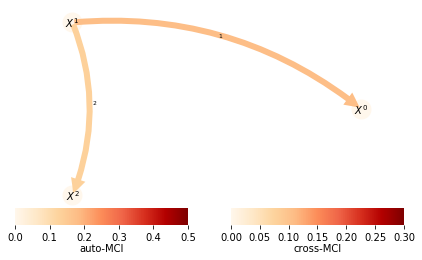

In [20]:
link_matrix = pcmci_cmi_knn.return_significant_parents(pq_matrix=results['p_matrix'],
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=0.,
    vmax_edges = 0.3,
    edge_ticks=0.05,
    cmap_edges='OrRd',
    vmin_nodes=0,
    vmax_nodes=.5,
    node_ticks=.1,
    cmap_nodes='OrRd',
    )

